In [42]:
# phase kickback
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, transpile, assemble
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

In [43]:
# Implement phase kickback by setting target qubit as a eigenstate of
# of unitary applied in CU gate 
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_kickback = QuantumCircuit(qr,cr)
# lets set control in superpositon of 0 and 1 states -> |+⟩
# when unitary is X gate and lets set target as an eigenvalue |-⟩ that can be obtained by applying H on |1⟩ state 
qc_kickback.h(0) # superposition state 
qc_kickback.x(1) # set target to 1 and later transform it to |-⟩
qc_kickback.h(1) 
qc_kickback.cx(0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state to one qubit quantum state, let's measure MSB or the target qubit in this case  
qc_kickback.draw()

┌───┐          
q130_0: ┤ H ├───────■──
        ├───┤┌───┐┌─┴─┐
q130_1: ┤ X ├┤ H ├┤ X ├
        └───┘└───┘└───┘
  c7: 1/═══════════════

In [44]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_kickback, backend, shots=1)
sv = job.result().get_statevector(qc_kickback,2)
print(sv)


Statevector([ 0.5+0.j, -0.5-0.j, -0.5-0.j,  0.5+0.j],
            dims=(2, 2))


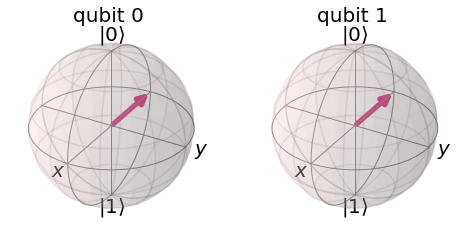

In [45]:
# plot entire 2 qubit state
plot_bloch_multivector(sv)


In [46]:
qc_kickback.measure([1],[0]) 
job = execute(qc_kickback, backend, shots=1)
sv = job.result().get_statevector(qc_kickback,2)
print(sv)
# get the statevector associated with the LSB or the control qubit
if (sv[0] != 0) :
    sv_0 = [sv[0], sv[1]]
else : 
    sv_0 = [sv[2], sv[3]]
# In statevector we can see that the probability amplitudes have been
# renormalized to 1/root(2) and state we get is equivalent to |-⟩
print(' the state of LSB is :', sv_0)


Statevector([ 0.71+0.j, -0.71-0.j,  0.  -0.j,  0.  +0.j],
            dims=(2, 2))
 the state of LSB is : [(0.71+0j), (-0.71-0j)]


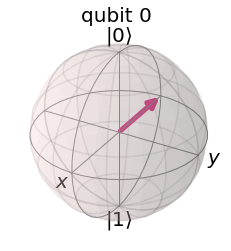

In [47]:
# plot LSb after the partial measurement of Q1
plot_bloch_multivector(sv_0)


In [48]:
# second example 
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_2 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when controlled unitary is CY gate and target is set to the eigenvalue |i+⟩ that can be obtained by applying S on |+⟩ state 
qc_2.h(0)  # set control to equal superposition of |0⟩ and |1⟩
qc_2.h(1) # set target to |+⟩
qc_2.s(1) # set target qubit to |i+⟩
qc_2.cy(0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  

qc_2.draw()

┌───┐          
q152_0: ┤ H ├───────■──
        ├───┤┌───┐┌─┴─┐
q152_1: ┤ H ├┤ S ├┤ Y ├
        └───┘└───┘└───┘
  c8: 1/═══════════════

In [49]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_2, backend, shots=1)
sv = job.result().get_statevector(qc_2,2)

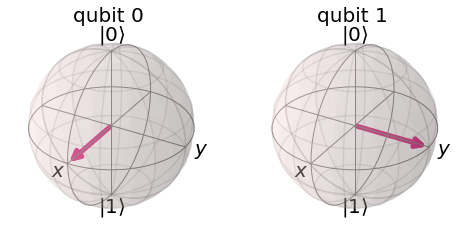

In [50]:
# plot entire 2 qubit state
plot_bloch_multivector(sv)

In [51]:
qc_2.measure([1],[0]) 
job = execute(qc_2, backend, shots=1)
sv = job.result().get_statevector(qc_2,2)
print(sv)
# get the statevector associated with the LSB or the control qubit
if (sv[0] != 0) :
    sv_0 = [sv[0], sv[1]]
else : 
    sv_0 = [sv[2], sv[3]]
# In statevector we can see that the probability amplitudes have been
# renormalized to 1/root(2) and state we get is equivalent to |+⟩
print(sv_0)
# hence we can see that when target has eigenvalue of +1 the state of
# control qubit is not getting any phase and remains unaffected as |+⟩ 

Statevector([0.+0.j  , 0.+0.j  , 0.+0.71j, 0.+0.71j],
            dims=(2, 2))
[0.71j, 0.71j]


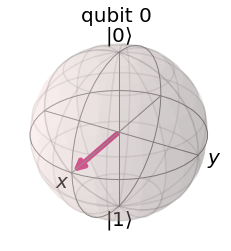

In [52]:
# plot state of LSB after partial measurement of Q1
plot_bloch_multivector(sv_0)

In [16]:
# end-of-program